In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv("D:\Py Django\DataScience\Decision Tree\Regression\energy_consumption_dataset_950.csv")
df

,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week,energy_consumption
0,24.363503,66.031012,8.313398,4,Night,Fri,25.365429
1,38.767858,69.902200,0.078444,1,Afternoon,Thu,37.330928
2,33.299849,40.522277,11.414861,2,Afternoon,Sat,29.352114
3,29.966462,84.864717,0.529670,1,Morning,Fri,34.962693
4,18.900466,55.126231,11.186007,4,Evening,Wed,22.837731
...,...,...,...,...,...,...,...
945,15.274896,73.984278,5.356817,6,Morning,Tue,20.466653
946,18.422141,66.959127,11.813236,7,Evening,Sat,23.335067
947,37.500466,41.281484,3.765021,5,Morning,Sat,36.134230
948,36.847252,51.323074,8.461110,3,Morning,Mon,37.149819


In [14]:
label_encoders = {}
for column in df.columns[:-1]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df


,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week,energy_consumption
0,372,541,531,3,3,0,25.365429
1,908,618,6,0,0,4,37.330928
2,699,172,720,1,0,2,29.352114
3,579,860,38,0,2,0,34.962693
4,167,382,707,3,1,6,22.837731
...,...,...,...,...,...,...,...
945,6,692,333,5,2,5,20.466653
946,142,559,749,6,1,2,23.335067
947,854,186,228,4,2,2,36.134230
948,823,333,540,2,2,1,37.149819


In [15]:
x = df.drop("energy_consumption",axis = 1)
y = df["energy_consumption"]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [17]:
model = DecisionTreeRegressor(random_state=40)
model.fit(x_train , y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [18]:
x_pred = model.predict(x_test)
x_pred

array([23.90906731, 21.44417306, 39.58660034, 36.73208037, 26.74228677,
       37.14981858, 34.31407209, 28.50509294, 20.34800994, 12.98329642,
       19.63922028, 27.12488613, 27.18872992, 35.44610334, 19.03351732,
       26.52571112, 36.73857613, 31.5312373 , 21.93182163, 38.1004123 ,
       29.66062616, 27.46360893, 15.46149982, 36.8114921 , 33.08550389,
       26.74228677, 35.44610334, 32.79213593, 21.2092774 , 32.26371265,
       35.18459673, 25.05970839, 21.2092774 , 34.31407209, 29.8095149 ,
       27.33198628, 16.98801565, 33.08550389, 20.28036975, 25.43948724,
       35.66612298, 25.14451387, 30.92734296, 35.48511117, 33.70445543,
       38.32739379, 29.79607521, 35.02844745, 28.53199519, 26.61647389,
       37.92454371, 20.84788434, 37.2681465 , 27.1855168 , 24.30349768,
       28.50509294, 40.00175104, 25.43948724, 22.47154749, 29.07270091,
       26.77163117, 30.61407961, 32.26371265, 32.04752702, 29.96457103,
       35.67907562, 31.40093493, 32.83614825, 23.26275141, 18.68

In [19]:
print("Mean Squared Error:",mean_squared_error(y_test,x_pred))

Mean Squared Error: 10.155613174392885


In [20]:
x_test.shape,y_test.shape

((190, 6), (190,))

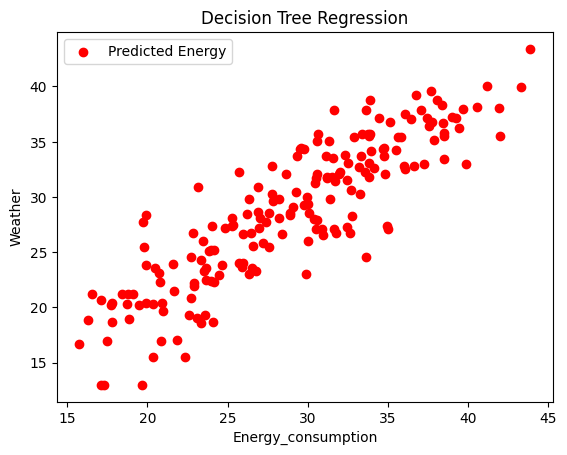

In [23]:
# plt.scatter(x_test,y_test,color="blue",label = " Actual Energy")
plt.scatter(y_test,x_pred,color = "red",label = "Predicted Energy")
plt.title("Decision Tree Regression")
plt.xlabel('Energy_consumption')
plt.ylabel('Weather')
plt.legend()
plt.show()